In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-education-dataset/ONLINE EDUCATION SYSTEM REVIEW.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/online-education-dataset/ONLINE EDUCATION SYSTEM REVIEW.csv')

In [4]:
df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Female,Rural,Under Graduate,19,3,Mobile,Middle Class,6,5,Yes,...,4,Yes,Yes,yes,91-100,4,4,Theory,8,Average
1029,Female,Rural,Under Graduate,20,6,Desktop,Middle Class,3,1,No,...,2,Yes,Yes,No,71-80,5,5,Theory,10,Average
1030,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,3,2,No,...,3,No,Yes,yes,71-80,2,2,Theory,6,Average
1031,Female,Rural,Under Graduate,19,6,Mobile,Middle Class,2,3,Yes,...,2,Yes,No,No,61-70,3,3,Both,6,Good


In [5]:
df.shape

(1033, 23)

In [6]:
df.columns

Index(['Gender', 'Home Location', 'Level of Education', 'Age(Years)',
       'Number of Subjects', 'Device type used to attend classes',
       'Economic status', 'Family size', 'Internet facility in your locality',
       'Are you involved in any sports?', 'Do elderly people monitor you?',
       'Study time (Hours)', 'Sleep time (Hours)',
       'Time spent on social media (Hours)', 'Interested in Gaming?',
       'Have separate room for studying?', 'Engaged in group studies?',
       'Average marks scored before pandemic in traditional classroom',
       'Your interaction in online mode',
       'Clearing doubts with faculties in online mode', 'Interested in?',
       'Performance in online',
       'Your level of satisfaction in Online Education'],
      dtype='object')

In [7]:
df.isnull()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1029,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1031,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# *Data Pre-Processing*

In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
#binary encoding of gender column

df['Gender_binary'] = df['Gender'].apply(lambda x:1 if x=='Female' else 0)

In [10]:
df['Home Location'].unique()

array(['Urban', 'Rural'], dtype=object)

In [11]:
#binary encoding of home location column

df['Home Location_binary'] = df['Home Location'].apply(lambda x:1 if x=='Urban' else 0)

In [12]:
df['Level of Education'].unique()

array(['Under Graduate', 'Post Graduate', 'School'], dtype=object)

In [13]:
#one-hot encoding of level of education column

encoded_df = pd.get_dummies(df['Level of Education'], prefix='Education')
df = pd.concat([df, encoded_df], axis=1)

In [14]:
df['Age(Years)'].unique()

array([18, 19, 17, 20, 25, 21, 23, 24, 22, 26,  9, 38, 37, 12, 40, 34, 27,
       28, 30, 32, 39, 35, 29, 36])

In [15]:
#binning of age column

bins = [0, 12, 18, 25, 35, 45]  # bin edges
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Mature Adult']  # bin labels

# Create a new column 'Age Group' with binned age values
df['Age Group'] = pd.cut(df['Age(Years)'], bins=bins, labels=labels, right=False)

# Step: Convert Age Group to numeric values using Ordinal Encoding
age_group_mapping = {'Child': 0, 'Teen': 1, 'Young Adult': 2, 'Adult': 3, 'Mature Adult': 4}
df['Age Group Encoded'] = df['Age Group'].map(age_group_mapping)


In [16]:
df['Device type used to attend classes'].unique()

array(['Laptop', 'Desktop', 'Mobile'], dtype=object)

In [17]:
#one-hot encoding for device type 
encoded_df_device = pd.get_dummies(df['Device type used to attend classes'],prefix = 'Device') 
df = pd.concat([df, encoded_df_device], axis = 1)

In [18]:
df['Economic status'].unique()

array(['Middle Class', 'Poor', 'Rich'], dtype=object)

In [19]:
#one-hot encoding for economic status

encoded_df_ecostat = pd.get_dummies(df['Economic status'],prefix = 'ecostat') 
df = pd.concat([df, encoded_df_ecostat], axis = 1)

In [20]:
df['Average marks scored before pandemic in traditional classroom'].unique()

array(['91-100', '71-80', '81-90', '61-70', '31-40', '41-50', '21-30',
       '11-20', '51-60', '0-10'], dtype=object)

In [21]:
#ordinal encoding for average marks column


marks_order = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['Average marks ordinal'] = pd.Categorical(df['Average marks scored before pandemic in traditional classroom'], categories=marks_order, ordered=True)

df['Average marks ordinal'] = df['Average marks ordinal'].cat.codes

In [22]:
df['Interested in?'].unique()

array(['Practical', 'Theory', 'Both'], dtype=object)

In [23]:
#one-hot encoding for Interested in? column

encoded_df_interest = pd.get_dummies(df['Interested in?'],prefix = 'interest') 
df = pd.concat([df, encoded_df_interest], axis = 1)

In [24]:
#binary encoding of Are you involved in any sports? column

df['Are you involved in any sports?'] = df['Are you involved in any sports?'].apply(lambda x:1 if x=='Yes' else 0)

In [25]:
#binary encoding of Do elderly people monitor you? column

df['Do elderly people monitor you?'] = df['Do elderly people monitor you?'].apply(lambda x:1 if x=='Yes' else 0)

In [26]:
#binary encoding of Do elderly people monitor you? column

df['Interested in Gaming?'] = df['Interested in Gaming?'].apply(lambda x:1 if x=='Yes' else 0)

In [27]:
#binary encoding of Have separate room for studying? column

df['Have separate room for studying?'] = df['Have separate room for studying?'].apply(lambda x:1 if x=='Yes' else 0)

In [28]:
#binary encoding of Do elderly people monitor you? column

df['Engaged in group studies?'] = df['Engaged in group studies?'].apply(lambda x:1 if x=='Yes' else 0)

In [29]:
df['Your level of satisfaction in Online Education'].unique()

array(['Average', 'Bad', 'Good'], dtype=object)

In [30]:
#ordinal encoding for Your level of satisfaction in Online Education column



satisfaction_order = ['Bad', 'Average', 'Good']


df['Satisfaction_Encoded'] = pd.Categorical(df['Your level of satisfaction in Online Education'], categories=satisfaction_order, ordered=True)

# Convert to numeric encoding (0 = Bad, 1 = Average, 2 = Good)
df['Satisfaction_Encoded'] = df['Satisfaction_Encoded'].cat.codes

In [31]:
df.columns

Index(['Gender', 'Home Location', 'Level of Education', 'Age(Years)',
       'Number of Subjects', 'Device type used to attend classes',
       'Economic status', 'Family size', 'Internet facility in your locality',
       'Are you involved in any sports?', 'Do elderly people monitor you?',
       'Study time (Hours)', 'Sleep time (Hours)',
       'Time spent on social media (Hours)', 'Interested in Gaming?',
       'Have separate room for studying?', 'Engaged in group studies?',
       'Average marks scored before pandemic in traditional classroom',
       'Your interaction in online mode',
       'Clearing doubts with faculties in online mode', 'Interested in?',
       'Performance in online',
       'Your level of satisfaction in Online Education', 'Gender_binary',
       'Home Location_binary', 'Education_Post Graduate', 'Education_School',
       'Education_Under Graduate', 'Age Group', 'Age Group Encoded',
       'Device_Desktop', 'Device_Laptop', 'Device_Mobile',
       'ecostat

In [32]:
df.drop(columns = ['Gender','Home Location','Level of Education','Device type used to attend classes','Economic status','Are you involved in any sports?','Do elderly people monitor you?','Interested in Gaming?','Have separate room for studying?','Engaged in group studies?'],inplace = True)

In [33]:
 df.drop(columns = ['Average marks scored before pandemic in traditional classroom'],inplace = True)

In [34]:
 df.drop(columns = ['Interested in?','Your level of satisfaction in Online Education'],inplace = True)

In [35]:
 df.drop(columns = ['Age Group'],inplace = True)

In [36]:
df.to_csv('pre_processed_data.csv', index=False)


# *Feature Importance*


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and it has been preprocessed
X = df.drop(columns=['Satisfaction_Encoded'])
y = df['Satisfaction_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Set the threshold for feature selection
threshold = 0.02

# Select features based on the threshold
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()

# Create a new DataFrame with only the selected features
df_selected = df[selected_features + ['Satisfaction_Encoded']]  # Include target variable

# Display the selected features and the new DataFrame
print("Selected Features:", selected_features)
# print("\nDataFrame with Selected Features:")
# print(df_selected)


Selected Features: ['Clearing doubts with faculties in online mode', 'Performance in online', 'Your interaction in online mode', 'Number of Subjects', 'Study time (Hours)', 'Average marks ordinal', 'Age(Years)', 'Time spent on social media (Hours)', 'Sleep time (Hours)', 'Internet facility in your locality', 'Family size', 'Gender_binary', 'Home Location_binary']


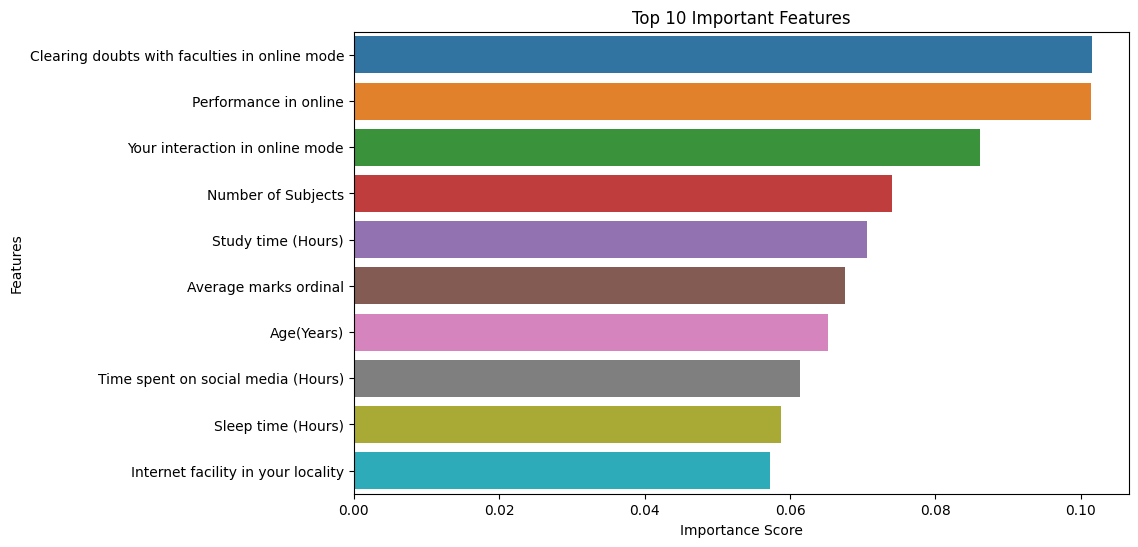

In [38]:
# Feature Importance Plot

import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [39]:
#Selecting relevant features from my dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder


# Convert categorical target variable to numeric using Label Encoding
label_encoder = LabelEncoder()
df['Satisfaction_Encoded'] = label_encoder.fit_transform(df['Satisfaction_Encoded'])

# Split data into features and target variable
X = df.drop(columns=['Satisfaction_Encoded'])
y = df['Satisfaction_Encoded']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SelectKBest with chi-squared test
selector = SelectKBest(score_func=chi2, k='all')  
selector.fit(X_train, y_train)

# Get the scores for each feature
scores = selector.scores_

# Create a DataFrame for feature scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores
print(feature_scores_df)

# Set the threshold for feature selection (you can adjust this threshold)
threshold = 5  # Example threshold for significance

# Select features based on the threshold
selected_features = feature_scores_df[feature_scores_df['Score'] > threshold]['Feature'].tolist()

# Create a new DataFrame with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Display the selected features and the new DataFrame
print("Selected Features:", selected_features)
# print("\nSelected Training Data:")
# print(X_train_selected)
# print("\nSelected Testing Data:")
# print(X_test_selected)


                                          Feature      Score
8   Clearing doubts with faculties in online mode  93.486609
7                 Your interaction in online mode  70.863458
9                           Performance in online  70.391097
17                                  Device_Mobile  15.388578
29                            Age Group Encoded_4  15.375127
24                                interest_Theory  14.335050
21                          Average marks ordinal  10.668465
4                              Study time (Hours)   8.523315
16                                  Device_Laptop   7.942656
0                                      Age(Years)   7.489864
6              Time spent on social media (Hours)   6.604564
10                                  Gender_binary   4.338446
23                             interest_Practical   4.187444
20                                   ecostat_Rich   3.912713
3              Internet facility in your locality   3.375531
1                       

# *Statistical Analysis*

In [40]:
#Descriptive Analysis

# Descriptive statistics for the relevant features
df[['Satisfaction_Encoded', 'Clearing doubts with faculties in online mode', 
           'Your interaction in online mode', 'Performance in online', 
           'Device_Mobile', 'Age Group Encoded', 'interest_Theory', 
           'Average marks ordinal', 'Study time (Hours)', 
           'Device_Laptop', 'Age(Years)', 'Time spent on social media (Hours)']].describe()


,Satisfaction_Encoded,Clearing doubts with faculties in online mode,Your interaction in online mode,Performance in online,Average marks ordinal,Study time (Hours),Age(Years),Time spent on social media (Hours)
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,1.009681,2.833495,2.930300,6.696031,7.235237,4.325266,19.798645,2.636980
std,0.690399,1.163629,1.105387,1.920048,1.418263,2.134233,3.199158,1.859625
min,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,9.000000,1.000000
25%,1.000000,2.000000,2.000000,6.000000,7.000000,3.000000,18.000000,1.000000
50%,1.000000,3.000000,3.000000,7.000000,7.000000,4.000000,19.000000,2.000000
75%,1.000000,4.000000,4.000000,8.000000,8.000000,6.000000,20.000000,3.000000
max,2.000000,5.000000,5.000000,10.000000,9.000000,10.000000,40.000000,10.000000


<Figure size 1500x1000 with 0 Axes>

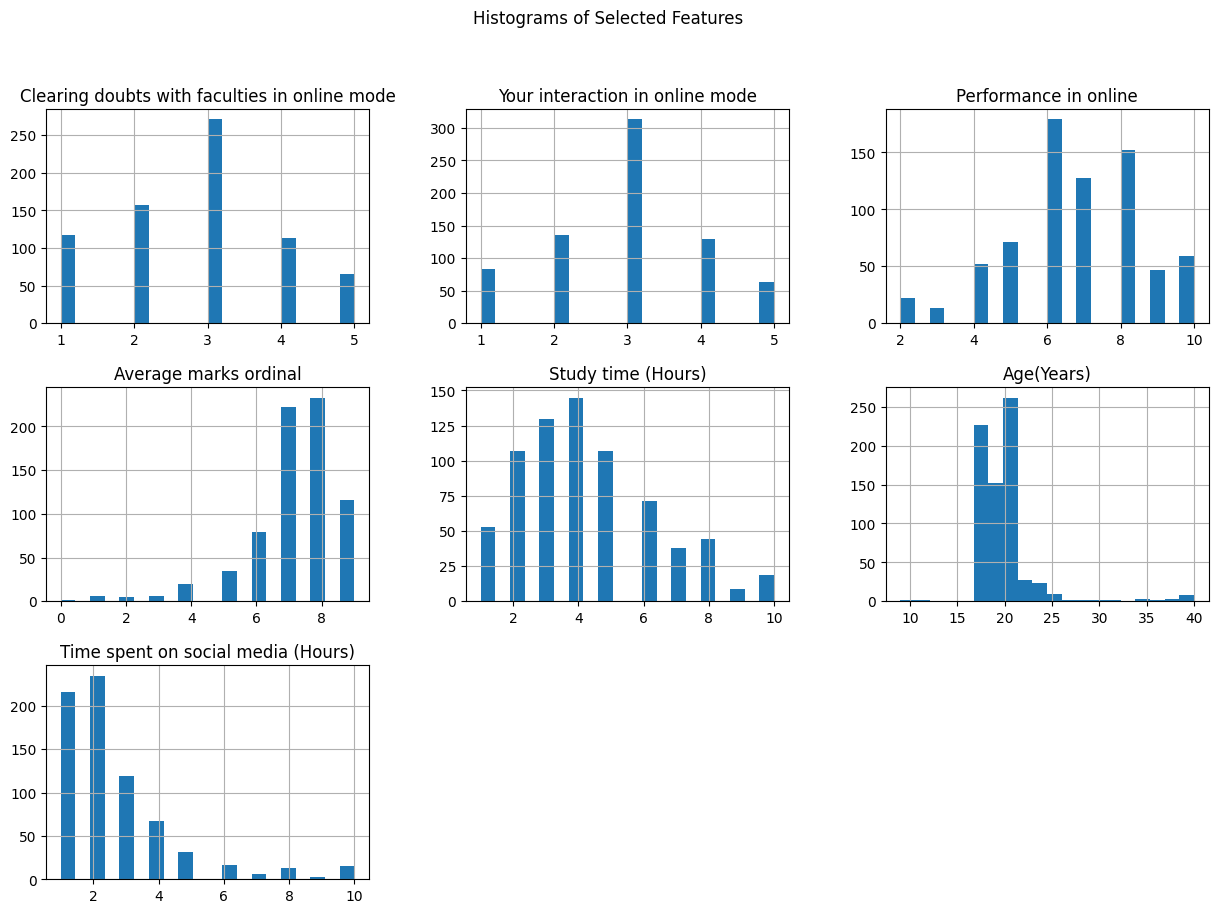

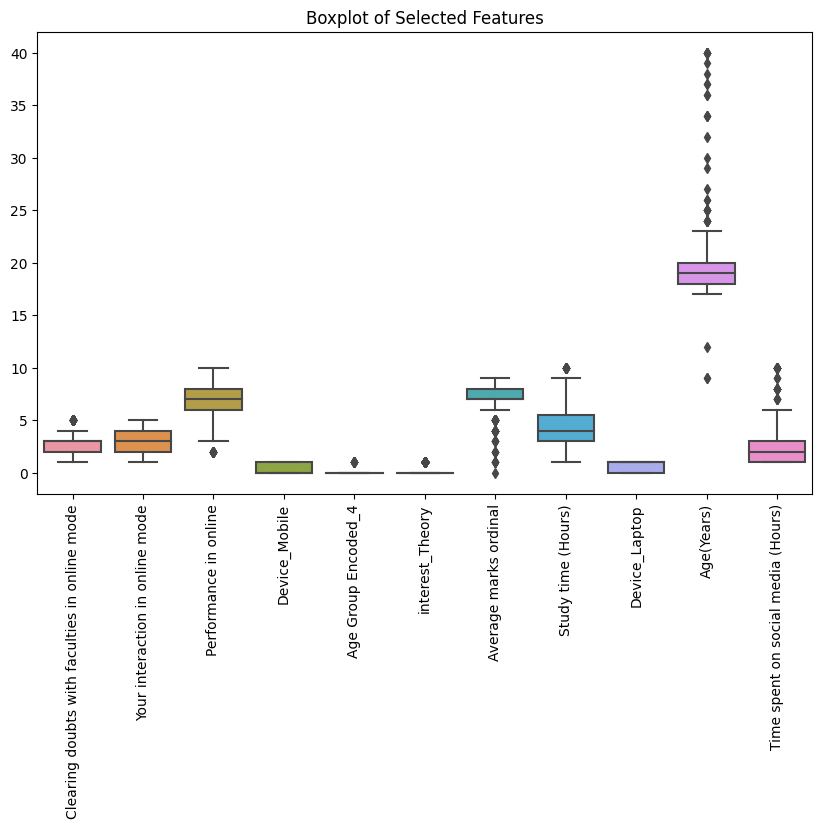

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of selected features
plt.figure(figsize=(15, 10))
X_train[selected_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Selected Features")
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train[selected_features])
plt.title('Boxplot of Selected Features')
plt.xticks(rotation=90)
plt.show()


In [42]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality for each selected feature
for feature in selected_features:
    stat, p_value = shapiro(X_train[feature])
    print(f'{feature}: p-value = {p_value}')
    if p_value > 0.05:
        print(f'{feature} appears to be normally distributed\n')
    else:
        print(f'{feature} does not appear to be normally distributed\n')


Clearing doubts with faculties in online mode: p-value = 2.1651007593428326e-20
Clearing doubts with faculties in online mode does not appear to be normally distributed

Your interaction in online mode: p-value = 9.13048080315794e-21
Your interaction in online mode does not appear to be normally distributed

Performance in online: p-value = 4.538902055450839e-14
Performance in online does not appear to be normally distributed

Device_Mobile: p-value = 4.129366000464735e-38
Device_Mobile does not appear to be normally distributed

Age Group Encoded_4: p-value = 1.7228953427111247e-49
Age Group Encoded_4 does not appear to be normally distributed

interest_Theory: p-value = 1.9077375993302222e-40
interest_Theory does not appear to be normally distributed

Average marks ordinal: p-value = 7.117047976096558e-26
Average marks ordinal does not appear to be normally distributed

Study time (Hours): p-value = 2.7474254589648943e-16
Study time (Hours) does not appear to be normally distributed


In [43]:
!pip install statsmodels


In [44]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'df' is your DataFrame with the relevant features and target variable

# List of your relevant features
relevant_features = [
    'Clearing doubts with faculties in online mode', 
    'Your interaction in online mode', 
    'Performance in online', 
    'Device_Mobile', 
    'Age Group Encoded', 
    'interest_Theory', 
    'Average marks ordinal', 
    'Study time (Hours)', 
    'Device_Laptop', 
    'Age(Years)', 
    'Time spent on social media (Hours)'
]

# Iterate over each relevant feature to perform Tukey's HSD Test
for feature in relevant_features:
    print(f"\nTukey's HSD Test for '{feature}':")
    
    # Prepare the data for Tukey's test
    tukey_data = pd.DataFrame({
        'Feature': df[feature],
        'Satisfaction_Encoded': df['Satisfaction_Encoded']
    })
    
    # Perform Tukey's HSD test
    tukey_results = pairwise_tukeyhsd(endog=tukey_data['Feature'], groups=tukey_data['Satisfaction_Encoded'], alpha=0.05)
    
    # Print the results
    print(tukey_results)



Tukey's HSD Test for 'Clearing doubts with faculties in online mode':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.9979   0.0 0.8174 1.1783   True
     0      2   1.7576   0.0 1.5475 1.9677   True
     1      2   0.7597   0.0 0.5818 0.9377   True
-------------------------------------------------

Tukey's HSD Test for 'Your interaction in online mode':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   0.9035   0.0 0.7316 1.0755   True
     0      2   1.6592   0.0  1.459 1.8594   True
     1      2   0.7557   0.0 0.5861 0.9252   True
-------------------------------------------------

Tukey's HSD Test for 'Performance in online':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------

*Clearing doubts with faculties in online mode ,
Your interaction in online mode ,
Performance in online ,
Device_Mobile ,
Age Group Encoded ,
interest_Theory ,
Average marks ordinal ,
Device_Laptop ,
Age(Years)*

# *Using Machine Learning Algorithms*

In [45]:
!pip install scikit-learn


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

Class Distribution:
Satisfaction_Encoded
1    541
2    251
0    241
Name: count, dtype: int64


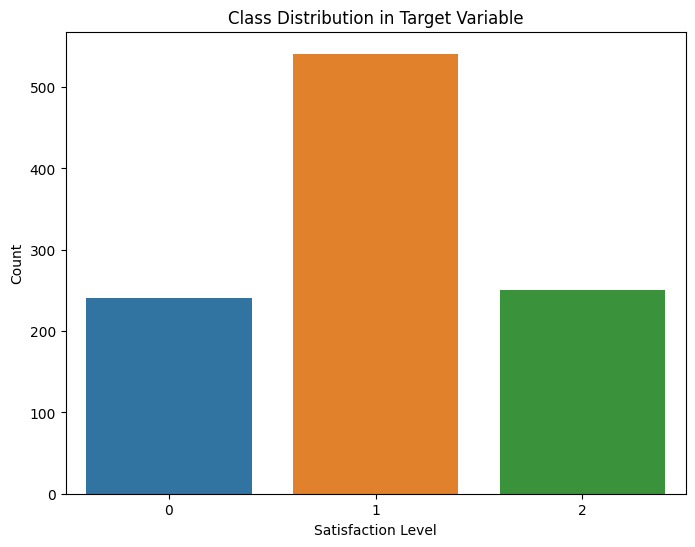

Model: Logistic Regression
Accuracy: 0.5967741935483871
F1 Score: 0.5899942656291318
Precision Score: 0.625596661403113
Recall Score: 0.5967741935483871
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        72
           1       0.70      0.46      0.55       160
           2       0.53      0.74      0.62        78

    accuracy                           0.60       310
   macro avg       0.60      0.65      0.60       310
weighted avg       0.63      0.60      0.59       310

Model: Random Forest
Accuracy: 0.5387096774193548
F1 Score: 0.53464213792171
Precision Score: 0.5338839625620593
Recall Score: 0.5387096774193548
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        72
           1       0.56      0.62      0.59       160
           2       0.44      0.37      0.40        78

    accuracy                           0.54       310
   macro avg       0.52      0.51      0.51     

In [47]:
significant_features = [
    'Clearing doubts with faculties in online mode',
    'Your interaction in online mode',
    'Performance in online',
    'Device_Mobile',
    'Age Group Encoded',
    'interest_Theory',
    'Average marks ordinal',
    'Device_Laptop',
    'Age(Years)'
]

# Prepare feature matrix X and target vector y
X = df[significant_features]
y = df['Satisfaction_Encoded']

# Check for class balance
class_counts = y.value_counts()
print("Class Distribution:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution in Target Variable')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Optional: Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the models to evaluate, including Naive Bayes
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000,class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Support Vector Classifier': SVC(class_weight='balanced'),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
    print(classification_report(y_test, y_pred))
    print("=" * 40)

In [48]:
!pip install optuna


In [49]:
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# List of significant features
significant_features = [
    'Clearing doubts with faculties in online mode',
    'Your interaction in online mode',
    'Performance in online',
    'Device_Mobile',
    'Age Group Encoded',
    'interest_Theory',
    'Average marks ordinal',
    'Device_Laptop',
    'Age(Years)'
]

# Prepare feature matrix X and target vector y
X = df[significant_features]
y = df['Satisfaction_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the objective function for Optuna to optimize `var_smoothing`
def objective(trial):
    # Tune the smoothing parameter for GaussianNB
    var_smoothing = trial.suggest_float('var_smoothing', 1e-12, 1e-3, log=True)
    
    # Create and train the Naive Bayes model
    model = GaussianNB(var_smoothing=var_smoothing)
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    return f1

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the F1 score
study.optimize(objective, n_trials=100)  # Number of trials can be adjusted

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best F1 score: ", study.best_value)

# Train the final model with the best hyperparameters
best_model = GaussianNB(var_smoothing=study.best_params['var_smoothing'])
best_model.fit(X_train_scaled, y_train)

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_scaled)

# Print evaluation metrics for the final model
print("Final Model Evaluation:")
print("F1 Score:", f1_score(y_test, y_pred_best, average='weighted'))


[I 2024-10-15 21:38:21,462] A new study created in memory with name: no-name-8d8b267a-e20f-4b69-843f-536151b11cba
[I 2024-10-15 21:38:21,470] Trial 0 finished with value: 0.7015833128335891 and parameters: {'var_smoothing': 4.787511634924661e-07}. Best is trial 0 with value: 0.7015833128335891.
[I 2024-10-15 21:38:21,474] Trial 1 finished with value: 0.7015833128335891 and parameters: {'var_smoothing': 1.283555162930944e-06}. Best is trial 0 with value: 0.7015833128335891.
[I 2024-10-15 21:38:21,479] Trial 2 finished with value: 0.7015833128335891 and parameters: {'var_smoothing': 4.457211531714908e-08}. Best is trial 0 with value: 0.7015833128335891.
[I 2024-10-15 21:38:21,483] Trial 3 finished with value: 0.7015833128335891 and parameters: {'var_smoothing': 0.0002992633583977534}. Best is trial 0 with value: 0.7015833128335891.
[I 2024-10-15 21:38:21,488] Trial 4 finished with value: 0.7015833128335891 and parameters: {'var_smoothing': 1.6882535404101088e-05}. Best is trial 0 with va

Best hyperparameters:  {'var_smoothing': 4.787511634924661e-07}
Best F1 score:  0.7015833128335891
Final Model Evaluation:
F1 Score: 0.7015833128335891


In [50]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using Stratified K-Fold
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=skf, scoring='f1_weighted')

# Print the F1 scores for each fold and the mean score
print("Cross-validated F1 scores:", scores)
print("Mean F1 score:", np.mean(scores))


Cross-validated F1 scores: [0.55487666 0.6174683  0.67320063 0.60286841 0.53742419]
Mean F1 score: 0.5971676353240918


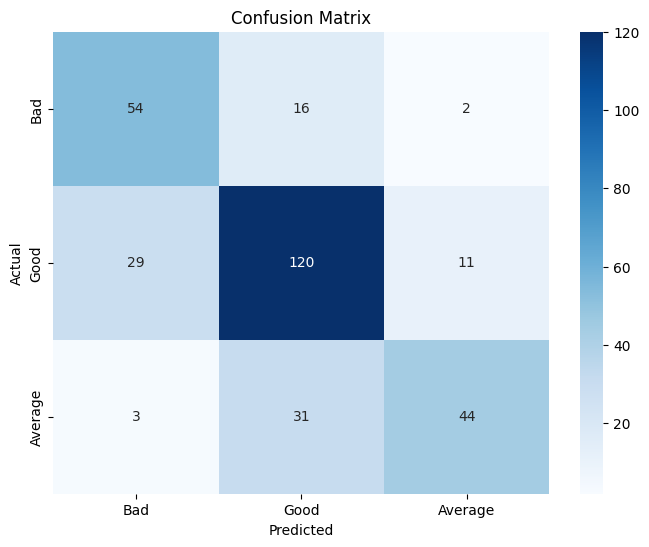

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good', 'Average'], yticklabels=['Bad', 'Good', 'Average'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [52]:
!pip install streamlit
!npm install localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 58.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.2 MB/s eta 0:00:00:00:0100:01
m##################] | reify:axios: http fetch GET 200 https://registry.npmjs.o/regis
added 22 packages in 2s

3 packages are looking for funding
  run `npm fund` for details
npm notice 
npm notice New minor version of npm available! 10.5.0 -> 10.9.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v10.9.0
npm notice Run npm install -g npm@10.9.0 to update!
npm notice 


In [63]:
%%writefile app.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import streamlit as st

# Load your DataFrame (make sure to replace with your actual data loading method)
df = pd.read_csv("/kaggle/working/pre_processed_data.csv")  # Adjust this path accordingly

# Strip leading/trailing whitespace from all column names
df.columns = df.columns.str.strip()

st.title("Online Education Review")

# Display the DataFrame
# st.write(df)

# Verify the columns in your DataFrame
# st.write("Actual columns in df:", df.columns.tolist())

significant_features = [
    'Clearing doubts with faculties in online mode',
    'Your interaction in online mode',
    'Performance in online',
    'Device_Mobile',
    'Age Group Encoded',
    'interest_Theory',
    'Average marks ordinal',
    'Device_Laptop',
    'Age(Years)'
]

# Check for missing columns
missing_columns = [col for col in significant_features if col not in df.columns]
if missing_columns:
    st.error(f"Missing columns in DataFrame: {missing_columns}")
else:
    # Prepare feature matrix X and target vector y
    X = df[significant_features]
    y = df['Satisfaction_Encoded']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Naive Bayes model
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Compute permutation importance for the trained model
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

    # Extract the importance and sort by descending order
    sorted_idx = perm_importance.importances_mean.argsort()[::-1]
    feature_names = X.columns[sorted_idx]
    importance_values = perm_importance.importances_mean[sorted_idx]

    # Plot feature importance
    def plot_feature_importance():
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importance_values, y=feature_names, palette="viridis")
        plt.xlabel("Importance scores")
        plt.ylabel("Features")
        plt.title("Feature Importance Plot")
        plt.tight_layout()
        plt.savefig("feature_importance.png")
        plt.close()
        return "feature_importance.png"

    # Prediction function
    def predict_model(clearing_doubts, interaction_online, performance_online, device_mobile, age_group_encoded, 
                      interest_theory, average_marks_ordinal, device_laptop, age_years):
        
        input_data = np.array([[
            clearing_doubts, interaction_online, performance_online, device_mobile, 
            age_group_encoded, interest_theory, average_marks_ordinal, device_laptop, age_years
        ]])
        
        prediction = model.predict(input_data)
        return "Good" if prediction[0] == 1 else "Bad"

    # Streamlit application
    st.title("Student Performance Prediction")

    # Tab for Feature Importance
    tab1, tab2 = st.tabs(["Dashboard - Feature Importance", "Model Predictions"])

    with tab1:
        st.markdown("## Feature Importance Dashboard")
        if st.button("Show Feature Importance"):
            plot_file = plot_feature_importance()
            st.image(plot_file, caption="Feature Importance Plot")

    with tab2:
        st.markdown("## Predict Student Performance")

        # Input fields
        clearing_doubts = st.number_input("Clearing doubts with faculties in online mode", min_value=0.0)
        interaction_online = st.number_input("Your interaction in online mode", min_value=0.0)
        performance_online = st.number_input("Performance in online", min_value=0.0)
        device_mobile = st.number_input("Device_Mobile (0: No, 1: Yes)", min_value=0, max_value=1)
        age_group_encoded = st.number_input("Age Group Encoded (0-3)", min_value=0, max_value=3)
        interest_theory = st.number_input("Interest in Theory (0: No, 1: Yes)", min_value=0, max_value=1)
        average_marks_ordinal = st.number_input("Average marks ordinal (1-5)", min_value=1, max_value=5)
        device_laptop = st.number_input("Device_Laptop (0: No, 1: Yes)", min_value=0, max_value=1)
        age_years = st.number_input("Age (Years)", min_value=0)

        if st.button("Predict Performance"):
            result = predict_model(
                clearing_doubts, interaction_online, performance_online, device_mobile,
                age_group_encoded, interest_theory, average_marks_ordinal, device_laptop, age_years
            )
            st.text(f"Predicted Performance: {result}")


Overwriting app.py


In [64]:
!curl ipv4.icanhazip.com

34.133.67.67


In [65]:
!streamlit run app.py &>./logs.txt & npx localtunnel --port 8501

your url is: https://crazy-mice-study.loca.lt
^C
